## CNN 모델: epochs=100, batch_size=40
- 테스트 세트 손실: 0.015682710334658623
- 테스트 세트 정확도: 0.99783551692962655

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 및 전처리
five_folder = '0'
rock_folder = '1'
one1_folder = '2'
one2_folder = '3'
two1_folder = '4'
two2_folder = '5'
etc_folder = '6'

five_files = [f for f in os.listdir(five_folder) if f.endswith('.csv')]
rock_files = [f for f in os.listdir(rock_folder) if f.endswith('.csv')]
one1_files = [f for f in os.listdir(one1_folder) if f.endswith('.csv')]
one2_files = [f for f in os.listdir(one2_folder) if f.endswith('.csv')]
two1_files = [f for f in os.listdir(two1_folder) if f.endswith('.csv')]
two2_files = [f for f in os.listdir(two2_folder) if f.endswith('.csv')]
etc_files = [f for f in os.listdir(etc_folder) if f.endswith('.csv')]

rock_data = []
five_data = []
one1_data = []
one2_data = []
two1_data = []
two2_data = []
etc_data = []

# 파일들을 병합하는 과정
for file in rock_files:
    filepath = os.path.join(rock_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    rock_data.append(df.values)

for file in five_files:
    filepath = os.path.join(five_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    five_data.append(df.values)

for file in one1_files:
    filepath = os.path.join(one1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one1_data.append(df.values)

for file in one2_files:
    filepath = os.path.join(one2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one2_data.append(df.values)

for file in two1_files:
    filepath = os.path.join(two1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two1_data.append(df.values)

for file in two2_files:
    filepath = os.path.join(two2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two2_data.append(df.values)

for file in etc_files:
    filepath = os.path.join(etc_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    etc_data.append(df.values)

# 데이터를 numpy 배열로 변환
rock_data = np.array(rock_data)
one1_data = np.array(one1_data)
one2_data = np.array(one2_data)
two1_data = np.array(two1_data)
two2_data = np.array(two2_data)
five_data = np.array(five_data)
etc_data = np.array(etc_data)

# 데이터와 레이블 합치기
X = np.concatenate([five_data, rock_data, one1_data, one2_data, two1_data, two2_data, etc_data], axis=0)
y = np.concatenate([np.zeros(five_data.shape[0]), np.ones(rock_data.shape[0]), 2 * np.ones(one1_data.shape[0]),
                    3 * np.ones(one2_data.shape[0]),
                    4 * np.ones(two1_data.shape[0]), 5 * np.ones(two2_data.shape[0]), 6 * np.ones(etc_data.shape[0])],
                   axis=0)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# CNN 모델 생성
conv_layer1 = layers.Conv1D(21, 2, padding='same')
conv_layer2 = layers.Conv1D(32, 2, padding='same', activation='relu')
conv_layer3 = layers.Conv1D(16, 2, activation='relu')

flatten = layers.Flatten()
dense1 = layers.Dense(32)
dense2 = layers.Dense(16)
dense3 = layers.Dense(7, activation='softmax')

inp = tf.keras.Input((21, 2))
x = conv_layer1(inp)
x = conv_layer2(x)
x = conv_layer3(x)
x = flatten(x)
x = dense1(x)
x = dense2(x)
out = dense3(x)

model = tf.keras.Model(inp, out, name='conv_model')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 콜백 정의
checkpoint_path = "best_model_pro.h5"
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1,
                                       save_best_only=True, mode='max')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# 저장된 최적의 모델 불러오기
saved_model = tf.keras.models.load_model(checkpoint_path)

# 모델 평가
loss, accuracy = saved_model.evaluate(X_test, y_test)
print("테스트 세트 손실:", loss)
print("테스트 세트 정확도:", accuracy)


# model = tf.keras.Sequential([
#     layers.LSTM(64, input_shape=(21, 2), return_sequences=True),
#     layers.Flatten(),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(7, activation='softmax')
# ])
# ## 모델부분만 바꿔서 돌리면됨



Epoch 1/100


307/312 [============================>.] - ETA: 0s - loss: 2.9315 - accuracy: 0.4576
Epoch 1: val_accuracy improved from -inf to 0.76263, saving model to best_model_pro.h5
312/312 [==============================] - 4s 6ms/step - loss: 2.8948 - accuracy: 0.4629 - val_loss: 0.6251 - val_accuracy: 0.7626
Epoch 2/100
 11/312 [>.............................] - ETA: 1s - loss: 0.5870 - accuracy: 0.7841

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


312/312 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.7976
Epoch 2: val_accuracy improved from 0.76263 to 0.82684, saving model to best_model_pro.h5
312/312 [==============================] - 1s 4ms/step - loss: 0.5027 - accuracy: 0.7976 - val_loss: 0.3889 - val_accuracy: 0.8268
Epoch 3/100
305/312 [============================>.] - ETA: 0s - loss: 0.3513 - accuracy: 0.8547
Epoch 3: val_accuracy improved from 0.82684 to 0.88600, saving model to best_model_pro.h5
312/312 [==============================] - 1s 4ms/step - loss: 0.3507 - accuracy: 0.8547 - val_loss: 0.2970 - val_accuracy: 0.8860
Epoch 4/100
308/312 [============================>.] - ETA: 0s - loss: 0.2868 - accuracy: 0.8848
Epoch 4: val_accuracy improved from 0.88600 to 0.90043, saving model to best_model_pro.h5
312/312 [==============================] - 1s 4ms/step - loss: 0.2863 - accuracy: 0.8853 - val_loss: 0.2543 - val_accuracy: 0.9004
Epoch 5/100
311/312 [============================>.] - ETA

In [3]:
train_accuracy_cnn = history.history['accuracy']
val_accuracy_cnn = history.history['val_accuracy']
train_loss_cnn = history.history['loss']
val_loss_cnn = history.history['val_loss']
model.summary()

Model: "conv_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21, 2)]           0         
                                                                 
 conv1d (Conv1D)             (None, 21, 21)            105       
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 32)            1376      
                                                                 
 conv1d_2 (Conv1D)           (None, 20, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 32)                10272     
                                                                 
 dense_1 (Dense)             (None, 16)                5

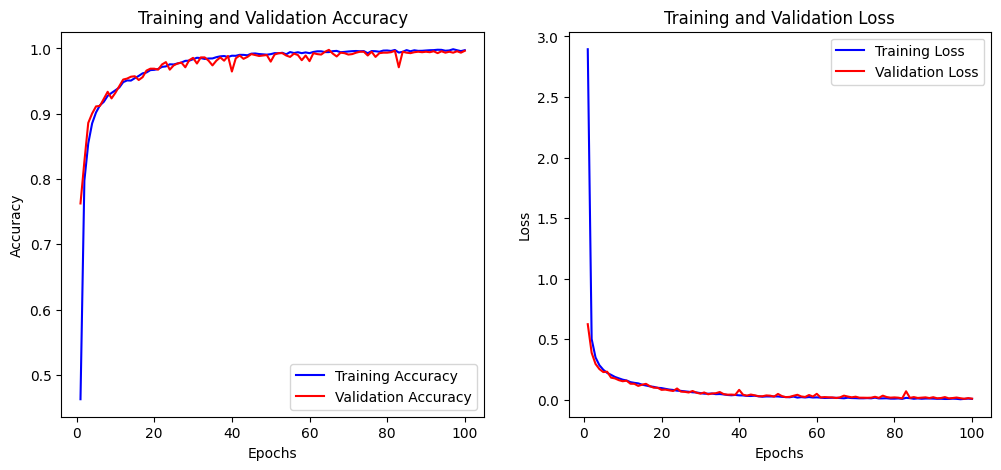

In [5]:
import matplotlib.pyplot as plt

# 그래프 그리기
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy_cnn, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy_cnn, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_cnn, 'b', label='Training Loss')
plt.plot(epochs, val_loss_cnn, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
## LSTM 모델: epochs=100, batch_size=40
- 테스트 세트 손실: 0.019841494038701057
- 테스트 세트 정확도: 0.9956709742546082

In [6]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 및 전처리
five_folder = '0'
rock_folder = '1'
one1_folder = '2'
one2_folder = '3'
two1_folder = '4'
two2_folder = '5'
etc_folder = '6'

five_files = [f for f in os.listdir(five_folder) if f.endswith('.csv')]
rock_files = [f for f in os.listdir(rock_folder) if f.endswith('.csv')]
one1_files = [f for f in os.listdir(one1_folder) if f.endswith('.csv')]
one2_files = [f for f in os.listdir(one2_folder) if f.endswith('.csv')]
two1_files = [f for f in os.listdir(two1_folder) if f.endswith('.csv')]
two2_files = [f for f in os.listdir(two2_folder) if f.endswith('.csv')]
etc_files = [f for f in os.listdir(etc_folder) if f.endswith('.csv')]

rock_data = []
five_data = []
one1_data = []
one2_data = []
two1_data = []
two2_data = []
etc_data = []

# 파일들을 병합하는 과정
for file in rock_files:
    filepath = os.path.join(rock_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    rock_data.append(df.values)

for file in five_files:
    filepath = os.path.join(five_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    five_data.append(df.values)

for file in one1_files:
    filepath = os.path.join(one1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one1_data.append(df.values)

for file in one2_files:
    filepath = os.path.join(one2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one2_data.append(df.values)

for file in two1_files:
    filepath = os.path.join(two1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two1_data.append(df.values)

for file in two2_files:
    filepath = os.path.join(two2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two2_data.append(df.values)

for file in etc_files:
    filepath = os.path.join(etc_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    etc_data.append(df.values)

# 데이터를 numpy 배열로 변환
rock_data = np.array(rock_data)
one1_data = np.array(one1_data)
one2_data = np.array(one2_data)
two1_data = np.array(two1_data)
two2_data = np.array(two2_data)
five_data = np.array(five_data)
etc_data = np.array(etc_data)

# 데이터와 레이블 합치기
X = np.concatenate([five_data, rock_data, one1_data, one2_data, two1_data, two2_data, etc_data], axis=0)
y = np.concatenate([np.zeros(five_data.shape[0]), np.ones(rock_data.shape[0]), 2 * np.ones(one1_data.shape[0]),
                    3 * np.ones(one2_data.shape[0]),
                    4 * np.ones(two1_data.shape[0]), 5 * np.ones(two2_data.shape[0]), 6 * np.ones(etc_data.shape[0])],
                   axis=0)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# LSTM 모델 생성
lstm_layer1 = layers.LSTM(64, return_sequences=True)
lstm_layer2 = layers.LSTM(32)
dense = layers.Dense(7, activation='softmax')

inp = tf.keras.Input((21, 2))
x = lstm_layer1(inp)
x = lstm_layer2(x)
out = dense(x)

model = tf.keras.Model(inp, out, name='lstm_model')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 콜백 정의
checkpoint_path = "best_model_pro.h5"
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1,
                                       save_best_only=True, mode='max')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# 저장된 최적의 모델 불러오기
saved_model = tf.keras.models.load_model(checkpoint_path)

# 모델 평가
loss, accuracy = saved_model.evaluate(X_test, y_test)
print("테스트 세트 손실:", loss)
print("테스트 세트 정확도:", accuracy)



Epoch 1/100
312/312 [==============================] - ETA: 0s - loss: 1.7094 - accuracy: 0.3947
Epoch 1: val_accuracy improved from -inf to 0.55267, saving model to best_model_pro.h5
312/312 [==============================] - 10s 17ms/step - loss: 1.7094 - accuracy: 0.3947 - val_loss: 1.4450 - val_accuracy: 0.5527
Epoch 2/100
  4/312 [..............................] - ETA: 6s - loss: 1.4351 - accuracy: 0.5312

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


309/312 [============================>.] - ETA: 0s - loss: 1.1097 - accuracy: 0.6501
Epoch 2: val_accuracy improved from 0.55267 to 0.70346, saving model to best_model_pro.h5
312/312 [==============================] - 4s 13ms/step - loss: 1.1069 - accuracy: 0.6506 - val_loss: 0.8260 - val_accuracy: 0.7035
Epoch 3/100
310/312 [============================>.] - ETA: 0s - loss: 0.6945 - accuracy: 0.7432
Epoch 3: val_accuracy improved from 0.70346 to 0.76190, saving model to best_model_pro.h5
312/312 [==============================] - 4s 13ms/step - loss: 0.6939 - accuracy: 0.7433 - val_loss: 0.5930 - val_accuracy: 0.7619
Epoch 4/100
309/312 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.8019
Epoch 4: val_accuracy improved from 0.76190 to 0.81097, saving model to best_model_pro.h5
312/312 [==============================] - 4s 13ms/step - loss: 0.5426 - accuracy: 0.8018 - val_loss: 0.4970 - val_accuracy: 0.8110
Epoch 5/100
311/312 [============================>.] - 

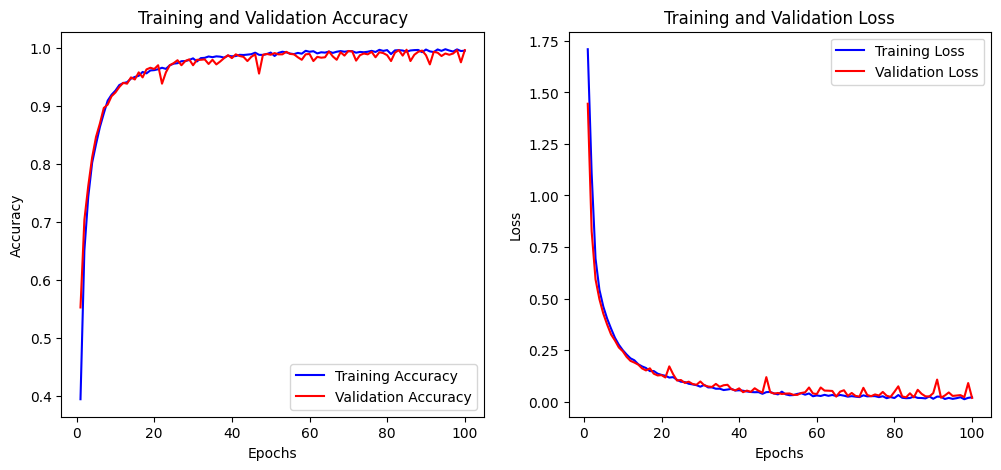

In [7]:
import matplotlib.pyplot as plt

# 훈련 및 검증 데이터에 대한 정확도와 손실 값을 가져오기
train_accuracy_lstm = history.history['accuracy']
val_accuracy_lstm = history.history['val_accuracy']
train_loss_lstm = history.history['loss']
val_loss_lstm = history.history['val_loss']

# 그래프 그리기
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy_lstm, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy_lstm, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_lstm, 'b', label='Training Loss')
plt.plot(epochs, val_loss_lstm, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## DNN 모델: epochs=100, batch_size=40
- 테스트 세트 손실: 0.0046815876848995686- 
테스트 세트 정확도: 1.0

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 및 전처리
five_folder = '0'
rock_folder = '1'
one1_folder = '2'
one2_folder = '3'
two1_folder = '4'
two2_folder = '5'
etc_folder = '6'

five_files = [f for f in os.listdir(five_folder) if f.endswith('.csv')]
rock_files = [f for f in os.listdir(rock_folder) if f.endswith('.csv')]
one1_files = [f for f in os.listdir(one1_folder) if f.endswith('.csv')]
one2_files = [f for f in os.listdir(one2_folder) if f.endswith('.csv')]
two1_files = [f for f in os.listdir(two1_folder) if f.endswith('.csv')]
two2_files = [f for f in os.listdir(two2_folder) if f.endswith('.csv')]
etc_files = [f for f in os.listdir(etc_folder) if f.endswith('.csv')]

rock_data = []
five_data = []
one1_data = []
one2_data = []
two1_data = []
two2_data = []
etc_data = []

# 파일들을 병합하는 과정
for file in rock_files:
    filepath = os.path.join(rock_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    rock_data.append(df.values)

for file in five_files:
    filepath = os.path.join(five_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    five_data.append(df.values)

for file in one1_files:
    filepath = os.path.join(one1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one1_data.append(df.values)

for file in one2_files:
    filepath = os.path.join(one2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one2_data.append(df.values)

for file in two1_files:
    filepath = os.path.join(two1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two1_data.append(df.values)

for file in two2_files:
    filepath = os.path.join(two2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two2_data.append(df.values)

for file in etc_files:
    filepath = os.path.join(etc_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    etc_data.append(df.values)

# 데이터를 numpy 배열로 변환
rock_data = np.array(rock_data)
one1_data = np.array(one1_data)
one2_data = np.array(one2_data)
two1_data = np.array(two1_data)
two2_data = np.array(two2_data)
five_data = np.array(five_data)
etc_data = np.array(etc_data)

# 데이터와 레이블 합치기
X = np.concatenate([five_data, rock_data, one1_data, one2_data, two1_data, two2_data, etc_data], axis=0)
y = np.concatenate([np.zeros(five_data.shape[0]), np.ones(rock_data.shape[0]), 2 * np.ones(one1_data.shape[0]),
                    3 * np.ones(one2_data.shape[0]),
                    4 * np.ones(two1_data.shape[0]), 5 * np.ones(two2_data.shape[0]), 6 * np.ones(etc_data.shape[0])],
                   axis=0)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# DNN 모델 생성
dense1 = layers.Dense(128, activation='relu')
dense2 = layers.Dense(64, activation='relu')
dense3 = layers.Dense(32, activation='relu')
dense4 = layers.Dense(7, activation='softmax')

inp = tf.keras.Input((21, 2))
x = layers.Flatten()(inp)
x = dense1(x)
x = dense2(x)
x = dense3(x)
out = dense4(x)

model = tf.keras.Model(inp, out, name='dnn_model')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 콜백 정의
checkpoint_path = "best_model_dnn_.h5"
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1,
                                       save_best_only=True, mode='max')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# 저장된 최적의 모델 불러오기
saved_model = tf.keras.models.load_model(checkpoint_path)

# 모델 평가
loss, accuracy = saved_model.evaluate(X_test, y_test)
print("테스트 세트 손실:", loss)
print("테스트 세트 정확도:", accuracy)




Epoch 1/100


287/312 [==========================>...] - ETA: 0s - loss: 5.3865 - accuracy: 0.5476
Epoch 1: val_accuracy improved from -inf to 0.81385, saving model to best_model_dnn_.h5
312/312 [==============================] - 2s 3ms/step - loss: 5.0033 - accuracy: 0.5691 - val_loss: 0.5885 - val_accuracy: 0.8139
Epoch 2/100
 21/312 [=>............................] - ETA: 0s - loss: 0.5756 - accuracy: 0.8238

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


305/312 [============================>.] - ETA: 0s - loss: 0.4062 - accuracy: 0.8722
Epoch 2: val_accuracy improved from 0.81385 to 0.87879, saving model to best_model_dnn_.h5
312/312 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8724 - val_loss: 0.3107 - val_accuracy: 0.8788
Epoch 3/100
303/312 [============================>.] - ETA: 0s - loss: 0.2394 - accuracy: 0.9238
Epoch 3: val_accuracy improved from 0.87879 to 0.95094, saving model to best_model_dnn_.h5
312/312 [==============================] - 1s 2ms/step - loss: 0.2386 - accuracy: 0.9242 - val_loss: 0.1760 - val_accuracy: 0.9509
Epoch 4/100
297/312 [===========================>..] - ETA: 0s - loss: 0.1708 - accuracy: 0.9487
Epoch 4: val_accuracy did not improve from 0.95094
312/312 [==============================] - 1s 2ms/step - loss: 0.1701 - accuracy: 0.9495 - val_loss: 0.1525 - val_accuracy: 0.9423
Epoch 5/100
299/312 [===========================>..] - ETA: 0s - loss: 0.1336 - accuracy: 0.963

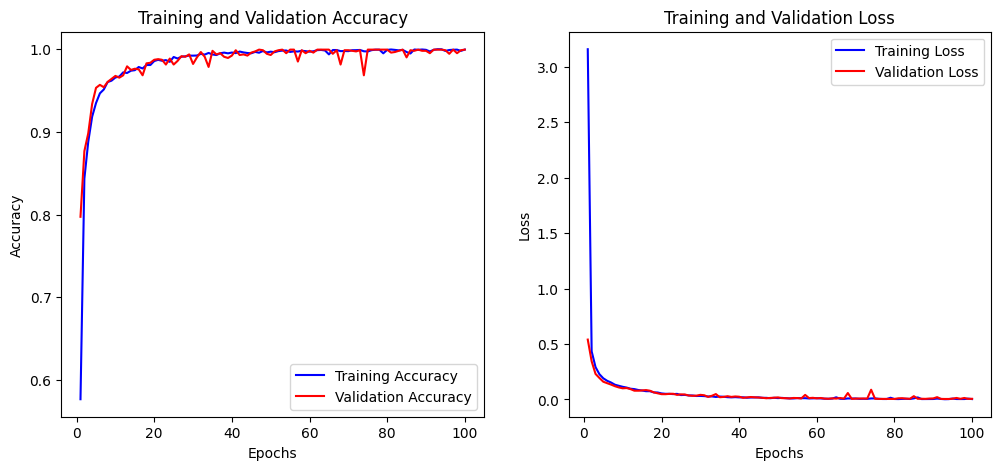

In [9]:
import matplotlib.pyplot as plt

# 훈련 및 검증 데이터에 대한 정확도와 손실 값을 가져오기
train_accuracy_dnn = history.history['accuracy']
val_accuracy_dnn = history.history['val_accuracy']
train_loss_dnn = history.history['loss']
val_loss_dnn = history.history['val_loss']

# 그래프 그리기
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy_dnn, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy_dnn, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_dnn, 'b', label='Training Loss')
plt.plot(epochs, val_loss_dnn, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
## DNN 모델: epochs=100, batch_size=20
테스트 세트 손실: 0.002502836287021637
테스트 세트 정확도: 1.0

In [21]:

import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 및 전처리
five_folder = '0'
rock_folder = '1'
one1_folder = '2'
one2_folder = '3'
two1_folder = '4'
two2_folder = '5'
etc_folder = '6'

five_files = [f for f in os.listdir(five_folder) if f.endswith('.csv')]
rock_files = [f for f in os.listdir(rock_folder) if f.endswith('.csv')]
one1_files = [f for f in os.listdir(one1_folder) if f.endswith('.csv')]
one2_files = [f for f in os.listdir(one2_folder) if f.endswith('.csv')]
two1_files = [f for f in os.listdir(two1_folder) if f.endswith('.csv')]
two2_files = [f for f in os.listdir(two2_folder) if f.endswith('.csv')]
etc_files = [f for f in os.listdir(etc_folder) if f.endswith('.csv')]

rock_data = []
five_data = []
one1_data = []
one2_data = []
two1_data = []
two2_data = []
etc_data = []

# 파일들을 병합하는 과정
for file in rock_files:
    filepath = os.path.join(rock_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    rock_data.append(df.values)

for file in five_files:
    filepath = os.path.join(five_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    five_data.append(df.values)

for file in one1_files:
    filepath = os.path.join(one1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one1_data.append(df.values)

for file in one2_files:
    filepath = os.path.join(one2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one2_data.append(df.values)

for file in two1_files:
    filepath = os.path.join(two1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two1_data.append(df.values)

for file in two2_files:
    filepath = os.path.join(two2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two2_data.append(df.values)

for file in etc_files:
    filepath = os.path.join(etc_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    etc_data.append(df.values)

# 데이터를 numpy 배열로 변환
rock_data = np.array(rock_data)
one1_data = np.array(one1_data)
one2_data = np.array(one2_data)
two1_data = np.array(two1_data)
two2_data = np.array(two2_data)
five_data = np.array(five_data)
etc_data = np.array(etc_data)

# 데이터와 레이블 합치기
X = np.concatenate([five_data, rock_data, one1_data, one2_data, two1_data, two2_data, etc_data], axis=0)
y = np.concatenate([np.zeros(five_data.shape[0]), np.ones(rock_data.shape[0]), 2 * np.ones(one1_data.shape[0]),
                    3 * np.ones(one2_data.shape[0]),
                    4 * np.ones(two1_data.shape[0]), 5 * np.ones(two2_data.shape[0]), 6 * np.ones(etc_data.shape[0])],
                   axis=0)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# DNN 모델 생성
dense1 = layers.Dense(128, activation='relu')
dense2 = layers.Dense(64, activation='relu')
dense3 = layers.Dense(32, activation='relu')
dense4 = layers.Dense(7, activation='softmax')

inp = tf.keras.Input((21, 2))
x = layers.Flatten()(inp)
x = dense1(x)
x = dense2(x)
x = dense3(x)
out = dense4(x)

model = tf.keras.Model(inp, out, name='dnn_model')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 콜백 정의
checkpoint_path = "best_model_pro.h5"
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1,
                                       save_best_only=True, mode='max')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# 저장된 최적의 모델 불러오기
saved_model = tf.keras.models.load_model(checkpoint_path)

# 모델 평가
loss, accuracy = saved_model.evaluate(X_test, y_test)
print("테스트 세트 손실:", loss)
print("테스트 세트 정확도:", accuracy)


Epoch 1/100
596/624 [===========================>..] - ETA: 0s - loss: 2.1575 - accuracy: 0.6640
Epoch 1: val_accuracy improved from -inf to 0.84271, saving model to best_model_pro.h5
624/624 [==============================] - 6s 3ms/step - loss: 2.0835 - accuracy: 0.6718 - val_loss: 0.4451 - val_accuracy: 0.8427
Epoch 2/100
 60/624 [=>............................] - ETA: 1s - loss: 0.4145 - accuracy: 0.8517

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


616/624 [============================>.] - ETA: 0s - loss: 0.3117 - accuracy: 0.8890
Epoch 2: val_accuracy improved from 0.84271 to 0.90043, saving model to best_model_pro.h5
624/624 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.8894 - val_loss: 0.2642 - val_accuracy: 0.9004
Epoch 3/100
624/624 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9276
Epoch 3: val_accuracy improved from 0.90043 to 0.92136, saving model to best_model_pro.h5
624/624 [==============================] - 1s 2ms/step - loss: 0.2117 - accuracy: 0.9276 - val_loss: 0.1825 - val_accuracy: 0.9214
Epoch 4/100
601/624 [===========================>..] - ETA: 0s - loss: 0.1640 - accuracy: 0.9437
Epoch 4: val_accuracy improved from 0.92136 to 0.95599, saving model to best_model_pro.h5
624/624 [==============================] - 1s 2ms/step - loss: 0.1632 - accuracy: 0.9447 - val_loss: 0.1422 - val_accuracy: 0.9560
Epoch 5/100
598/624 [===========================>..] - ETA

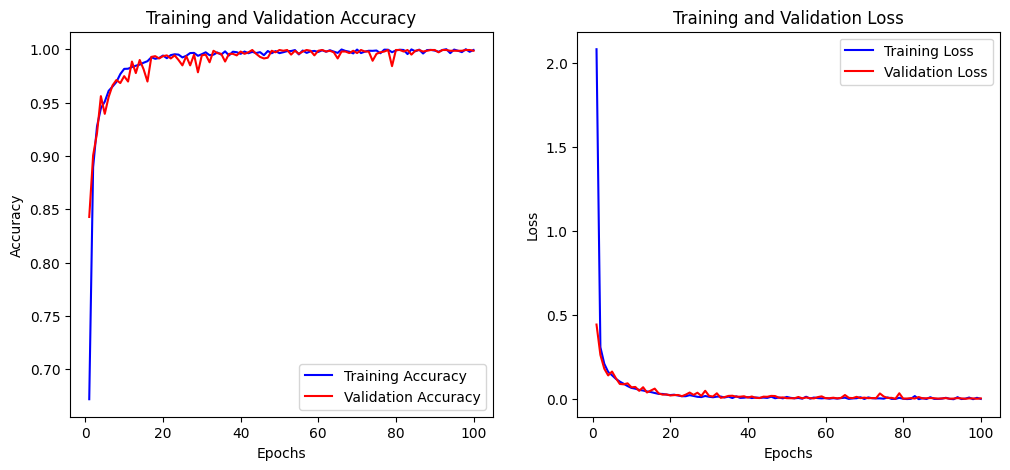

In [22]:
import matplotlib.pyplot as plt

# 훈련 및 검증 데이터에 대한 정확도와 손실 값을 가져오기
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 그래프 그리기
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## DNN 모델: epochs=100, batch_size=10
테스트 세트 손실: 0.002084667794406414
테스트 세트 정확도: 1.0

In [23]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 및 전처리
five_folder = '0'
rock_folder = '1'
one1_folder = '2'
one2_folder = '3'
two1_folder = '4'
two2_folder = '5'
etc_folder = '6'

five_files = [f for f in os.listdir(five_folder) if f.endswith('.csv')]
rock_files = [f for f in os.listdir(rock_folder) if f.endswith('.csv')]
one1_files = [f for f in os.listdir(one1_folder) if f.endswith('.csv')]
one2_files = [f for f in os.listdir(one2_folder) if f.endswith('.csv')]
two1_files = [f for f in os.listdir(two1_folder) if f.endswith('.csv')]
two2_files = [f for f in os.listdir(two2_folder) if f.endswith('.csv')]
etc_files = [f for f in os.listdir(etc_folder) if f.endswith('.csv')]

rock_data = []
five_data = []
one1_data = []
one2_data = []
two1_data = []
two2_data = []
etc_data = []

# 파일들을 병합하는 과정
for file in rock_files:
    filepath = os.path.join(rock_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    rock_data.append(df.values)

for file in five_files:
    filepath = os.path.join(five_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    five_data.append(df.values)

for file in one1_files:
    filepath = os.path.join(one1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one1_data.append(df.values)

for file in one2_files:
    filepath = os.path.join(one2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one2_data.append(df.values)

for file in two1_files:
    filepath = os.path.join(two1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two1_data.append(df.values)

for file in two2_files:
    filepath = os.path.join(two2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two2_data.append(df.values)

for file in etc_files:
    filepath = os.path.join(etc_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    etc_data.append(df.values)

# 데이터를 numpy 배열로 변환
rock_data = np.array(rock_data)
one1_data = np.array(one1_data)
one2_data = np.array(one2_data)
two1_data = np.array(two1_data)
two2_data = np.array(two2_data)
five_data = np.array(five_data)
etc_data = np.array(etc_data)

# 데이터와 레이블 합치기
X = np.concatenate([five_data, rock_data, one1_data, one2_data, two1_data, two2_data, etc_data], axis=0)
y = np.concatenate([np.zeros(five_data.shape[0]), np.ones(rock_data.shape[0]), 2 * np.ones(one1_data.shape[0]),
                    3 * np.ones(one2_data.shape[0]),
                    4 * np.ones(two1_data.shape[0]), 5 * np.ones(two2_data.shape[0]), 6 * np.ones(etc_data.shape[0])],
                   axis=0)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# DNN 모델 생성
dense1 = layers.Dense(128, activation='relu')
dense2 = layers.Dense(64, activation='relu')
dense3 = layers.Dense(32, activation='relu')
dense4 = layers.Dense(7, activation='softmax')

inp = tf.keras.Input((21, 2))
x = layers.Flatten()(inp)
x = dense1(x)
x = dense2(x)
x = dense3(x)
out = dense4(x)

model = tf.keras.Model(inp, out, name='dnn_model')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 콜백 정의
checkpoint_path = "best_model_dnn_batch10.h5"
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1,
                                       save_best_only=True, mode='max')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# 저장된 최적의 모델 불러오기
saved_model = tf.keras.models.load_model(checkpoint_path)

# 모델 평가
loss, accuracy = saved_model.evaluate(X_test, y_test)
print("테스트 세트 손실:", loss)
print("테스트 세트 정확도:", accuracy)

Epoch 1/100
1248/1248 [==============================] - ETA: 0s - loss: 1.1255 - accuracy: 0.7330
Epoch 1: val_accuracy improved from -inf to 0.87302, saving model to best_model_dnn_batch10.h5
1248/1248 [==============================] - 4s 2ms/step - loss: 1.1255 - accuracy: 0.7330 - val_loss: 0.3002 - val_accuracy: 0.8730
Epoch 2/100
  17/1248 [..............................] - ETA: 4s - loss: 0.2664 - accuracy: 0.9059

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1243/1248 [============================>.] - ETA: 0s - loss: 0.2457 - accuracy: 0.9079
Epoch 2: val_accuracy improved from 0.87302 to 0.94444, saving model to best_model_dnn_batch10.h5
1248/1248 [==============================] - 3s 2ms/step - loss: 0.2456 - accuracy: 0.9078 - val_loss: 0.1846 - val_accuracy: 0.9444
Epoch 3/100
1232/1248 [============================>.] - ETA: 0s - loss: 0.1832 - accuracy: 0.9333
Epoch 3: val_accuracy did not improve from 0.94444
1248/1248 [==============================] - 3s 2ms/step - loss: 0.1830 - accuracy: 0.9331 - val_loss: 0.1495 - val_accuracy: 0.9394
Epoch 4/100
1231/1248 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9485
Epoch 4: val_accuracy improved from 0.94444 to 0.96681, saving model to best_model_dnn_batch10.h5
1248/1248 [==============================] - 3s 2ms/step - loss: 0.1413 - accuracy: 0.9487 - val_loss: 0.1121 - val_accuracy: 0.9668
Epoch 5/100
1247/1248 [============================>.] - ETA: 0s - lo

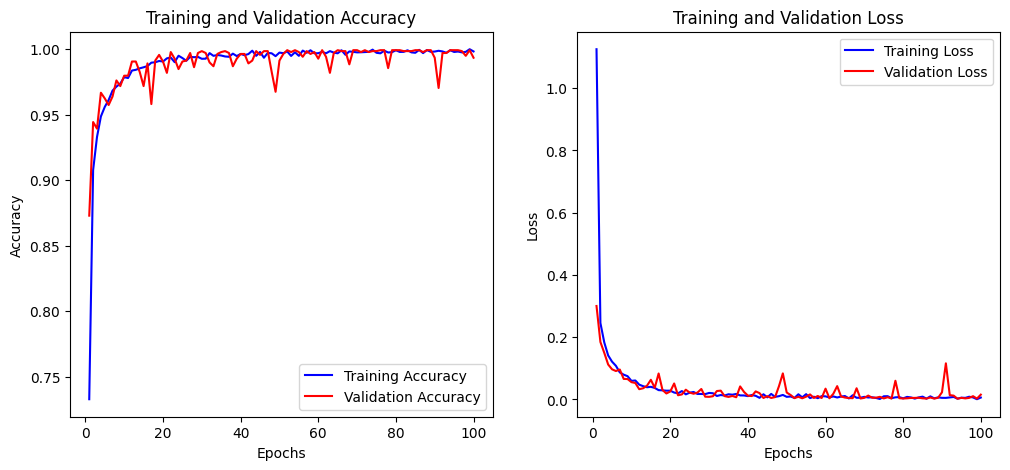

In [24]:
import matplotlib.pyplot as plt

# 훈련 및 검증 데이터에 대한 정확도와 손실 값을 가져오기
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 그래프 그리기
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## MLP 모델: epochs=100, batch_size=40
- 테스트 세트 손실: 0.004555395804345608- 
테스트 세트 정확도: 0.9992784857749939

In [8]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 및 전처리
five_folder = '0'
rock_folder = '1'
one1_folder = '2'
one2_folder = '3'
two1_folder = '4'
two2_folder = '5'
etc_folder = '6'

five_files = [f for f in os.listdir(five_folder) if f.endswith('.csv')]
rock_files = [f for f in os.listdir(rock_folder) if f.endswith('.csv')]
one1_files = [f for f in os.listdir(one1_folder) if f.endswith('.csv')]
one2_files = [f for f in os.listdir(one2_folder) if f.endswith('.csv')]
two1_files = [f for f in os.listdir(two1_folder) if f.endswith('.csv')]
two2_files = [f for f in os.listdir(two2_folder) if f.endswith('.csv')]
etc_files = [f for f in os.listdir(etc_folder) if f.endswith('.csv')]

rock_data = []
five_data = []
one1_data = []
one2_data = []
two1_data = []
two2_data = []
etc_data = []

# 파일들을 병합하는 과정
for file in rock_files:
    filepath = os.path.join(rock_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    rock_data.append(df.values)

for file in five_files:
    filepath = os.path.join(five_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    five_data.append(df.values)

for file in one1_files:
    filepath = os.path.join(one1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one1_data.append(df.values)

for file in one2_files:
    filepath = os.path.join(one2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one2_data.append(df.values)

for file in two1_files:
    filepath = os.path.join(two1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two1_data.append(df.values)

for file in two2_files:
    filepath = os.path.join(two2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two2_data.append(df.values)

for file in etc_files:
    filepath = os.path.join(etc_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    etc_data.append(df.values)

# 데이터를 numpy 배열로 변환
rock_data = np.array(rock_data)
one1_data = np.array(one1_data)
one2_data = np.array(one2_data)
two1_data = np.array(two1_data)
two2_data = np.array(two2_data)
five_data = np.array(five_data)
etc_data = np.array(etc_data)

# 데이터와 레이블 합치기
X = np.concatenate([five_data, rock_data, one1_data, one2_data, two1_data, two2_data, etc_data], axis=0)
y = np.concatenate([np.zeros(five_data.shape[0]), np.ones(rock_data.shape[0]), 2 * np.ones(one1_data.shape[0]),
                    3 * np.ones(one2_data.shape[0]),
                    4 * np.ones(two1_data.shape[0]), 5 * np.ones(two2_data.shape[0]), 6 * np.ones(etc_data.shape[0])],
                   axis=0)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# MLP 모델 생성
dense1 = layers.Dense(128, activation='relu')
dense2 = layers.Dense(64, activation='relu')
dense3 = layers.Dense(32, activation='relu')
dense4 = layers.Dense(7, activation='softmax')

inp = tf.keras.Input((21, 2))
x = layers.Flatten()(inp)
x = dense1(x)
x = dense2(x)
x = dense3(x)
out = dense4(x)

model = tf.keras.Model(inp, out, name='mlp_model')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 콜백 정의
checkpoint_path = "best_model_mlp.h5"
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1,
                                       save_best_only=True, mode='max')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# 저장된 최적의 모델 불러오기
saved_model = tf.keras.models.load_model(checkpoint_path)

# 모델 평가
loss, accuracy = saved_model.evaluate(X_test, y_test)
print("테스트 세트 손실:", loss)
print("테스트 세트 정확도:", accuracy)


Epoch 1/100
291/312 [==========================>...] - ETA: 0s - loss: 3.9345 - accuracy: 0.3255
Epoch 1: val_accuracy improved from -inf to 0.54906, saving model to best_model_mlp.h5
312/312 [==============================] - 1s 2ms/step - loss: 3.7535 - accuracy: 0.3373 - val_loss: 1.1091 - val_accuracy: 0.5491
Epoch 2/100
117/312 [==========>...................] - ETA: 0s - loss: 0.9855 - accuracy: 0.6109

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


304/312 [============================>.] - ETA: 0s - loss: 0.7891 - accuracy: 0.7017
Epoch 2: val_accuracy improved from 0.54906 to 0.82828, saving model to best_model_mlp.h5
312/312 [==============================] - 0s 2ms/step - loss: 0.7823 - accuracy: 0.7054 - val_loss: 0.4701 - val_accuracy: 0.8283
Epoch 3/100
307/312 [============================>.] - ETA: 0s - loss: 0.3651 - accuracy: 0.8808
Epoch 3: val_accuracy improved from 0.82828 to 0.90188, saving model to best_model_mlp.h5
312/312 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8816 - val_loss: 0.2751 - val_accuracy: 0.9019
Epoch 4/100
295/312 [===========================>..] - ETA: 0s - loss: 0.2492 - accuracy: 0.9255
Epoch 4: val_accuracy improved from 0.90188 to 0.93146, saving model to best_model_mlp.h5
312/312 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.9255 - val_loss: 0.2109 - val_accuracy: 0.9315
Epoch 5/100
291/312 [==========================>...] - ETA

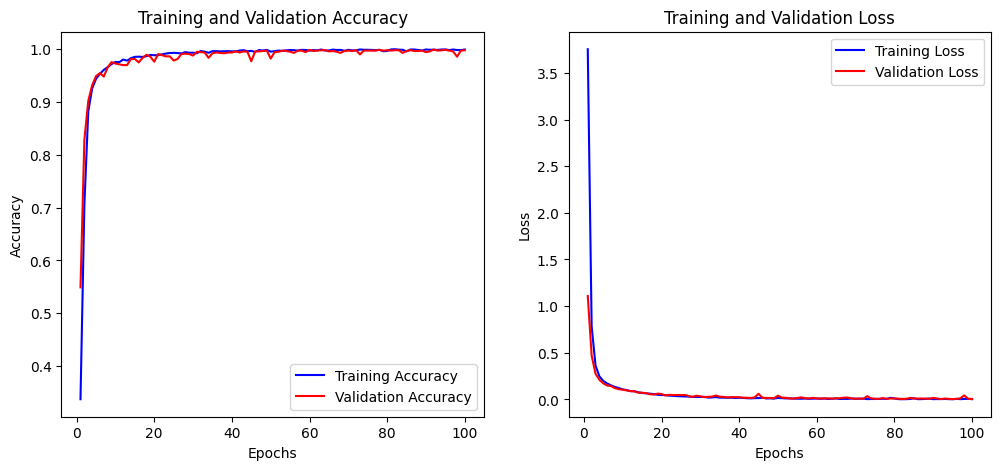

In [10]:
import matplotlib.pyplot as plt

# 훈련 및 검증 데이터에 대한 정확도와 손실 값을 가져오기
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 그래프 그리기
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## GRU 모델: epochs=100, batch_size=40

In [10]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 및 전처리
five_folder = '0'
rock_folder = '1'
one1_folder = '2'
one2_folder = '3'
two1_folder = '4'
two2_folder = '5'
etc_folder = '6'

five_files = [f for f in os.listdir(five_folder) if f.endswith('.csv')]
rock_files = [f for f in os.listdir(rock_folder) if f.endswith('.csv')]
one1_files = [f for f in os.listdir(one1_folder) if f.endswith('.csv')]
one2_files = [f for f in os.listdir(one2_folder) if f.endswith('.csv')]
two1_files = [f for f in os.listdir(two1_folder) if f.endswith('.csv')]
two2_files = [f for f in os.listdir(two2_folder) if f.endswith('.csv')]
etc_files = [f for f in os.listdir(etc_folder) if f.endswith('.csv')]

rock_data = []
five_data = []
one1_data = []
one2_data = []
two1_data = []
two2_data = []
etc_data = []

# 파일들을 병합하는 과정
for file in rock_files:
    filepath = os.path.join(rock_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    rock_data.append(df.values)

for file in five_files:
    filepath = os.path.join(five_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    five_data.append(df.values)

for file in one1_files:
    filepath = os.path.join(one1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one1_data.append(df.values)

for file in one2_files:
    filepath = os.path.join(one2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    one2_data.append(df.values)

for file in two1_files:
    filepath = os.path.join(two1_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two1_data.append(df.values)

for file in two2_files:
    filepath = os.path.join(two2_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    two2_data.append(df.values)

for file in etc_files:
    filepath = os.path.join(etc_folder, file)
    df = pd.read_csv(filepath, header=None, skiprows=1)
    etc_data.append(df.values)

# 데이터를 numpy 배열로 변환
rock_data = np.array(rock_data)
one1_data = np.array(one1_data)
one2_data = np.array(one2_data)
two1_data = np.array(two1_data)
two2_data = np.array(two2_data)
five_data = np.array(five_data)
etc_data = np.array(etc_data)

# 데이터와 레이블 합치기
X = np.concatenate([five_data, rock_data, one1_data, one2_data, two1_data, two2_data, etc_data], axis=0)
y = np.concatenate([np.zeros(five_data.shape[0]), np.ones(rock_data.shape[0]), 2 * np.ones(one1_data.shape[0]),
                    3 * np.ones(one2_data.shape[0]),
                    4 * np.ones(two1_data.shape[0]), 5 * np.ones(two2_data.shape[0]), 6 * np.ones(etc_data.shape[0])],
                   axis=0)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# GRU 모델 생성
gru_layer1 = layers.GRU(64, return_sequences=True)
gru_layer2 = layers.GRU(32)
dense = layers.Dense(7, activation='softmax')

inp = tf.keras.Input((21, 2))
x = gru_layer1(inp)
x = gru_layer2(x)
out = dense(x)

model = tf.keras.Model(inp, out, name='gru_model')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 콜백 정의
checkpoint_path = "best_model_pro.h5"
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1,
                                       save_best_only=True, mode='max')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# 저장된 최적의 모델 불러오기
saved_model = tf.keras.models.load_model(checkpoint_path)

# 모델 평가
loss, accuracy = saved_model.evaluate(X_test, y_test)
print("테스트 세트 손실:", loss)
print("테스트 세트 정확도:", accuracy)


Epoch 1/100
311/312 [============================>.] - ETA: 0s - loss: 1.7052 - accuracy: 0.3650
Epoch 1: val_accuracy improved from -inf to 0.53968, saving model to best_model_pro.h5
312/312 [==============================] - 13s 26ms/step - loss: 1.7046 - accuracy: 0.3655 - val_loss: 1.4519 - val_accuracy: 0.5397
Epoch 2/100
  2/312 [..............................] - ETA: 18s - loss: 1.4395 - accuracy: 0.6000

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


312/312 [==============================] - ETA: 0s - loss: 1.2871 - accuracy: 0.5835
Epoch 2: val_accuracy improved from 0.53968 to 0.66017, saving model to best_model_pro.h5
312/312 [==============================] - 9s 29ms/step - loss: 1.2871 - accuracy: 0.5835 - val_loss: 1.1293 - val_accuracy: 0.6602
Epoch 3/100
310/312 [============================>.] - ETA: 0s - loss: 1.0336 - accuracy: 0.6649
Epoch 3: val_accuracy improved from 0.66017 to 0.72799, saving model to best_model_pro.h5
312/312 [==============================] - 6s 20ms/step - loss: 1.0335 - accuracy: 0.6644 - val_loss: 0.9289 - val_accuracy: 0.7280
Epoch 4/100
311/312 [============================>.] - ETA: 0s - loss: 0.8550 - accuracy: 0.7198
Epoch 4: val_accuracy improved from 0.72799 to 0.75180, saving model to best_model_pro.h5
312/312 [==============================] - 8s 25ms/step - loss: 0.8552 - accuracy: 0.7197 - val_loss: 0.7702 - val_accuracy: 0.7518
Epoch 5/100
311/312 [============================>.] - 

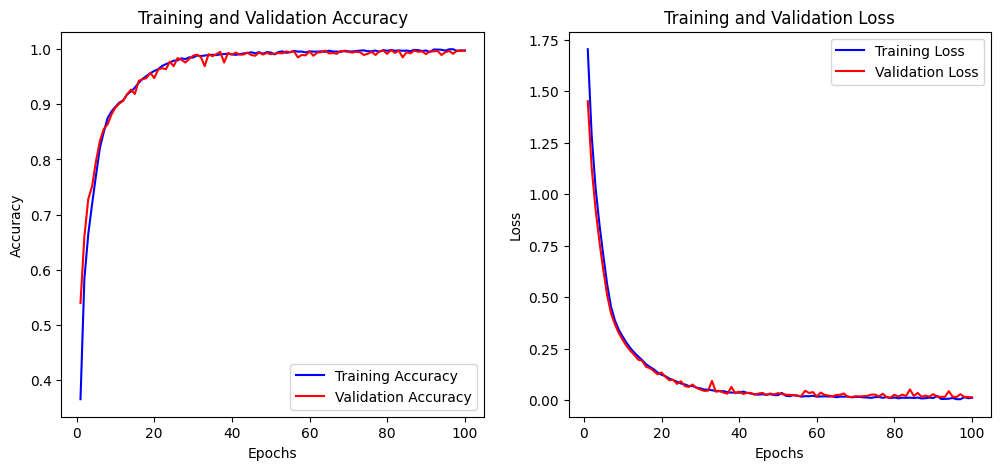

In [11]:
import matplotlib.pyplot as plt

# 훈련 및 검증 데이터에 대한 정확도와 손실 값을 가져오기
train_accuracy_gru = history.history['accuracy']
val_accuracy_gru = history.history['val_accuracy']
train_loss_gru = history.history['loss']
val_loss_gru = history.history['val_loss']

# 그래프 그리기
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy_gru, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy_gru, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_gru, 'b', label='Training Loss')
plt.plot(epochs, val_loss_gru, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

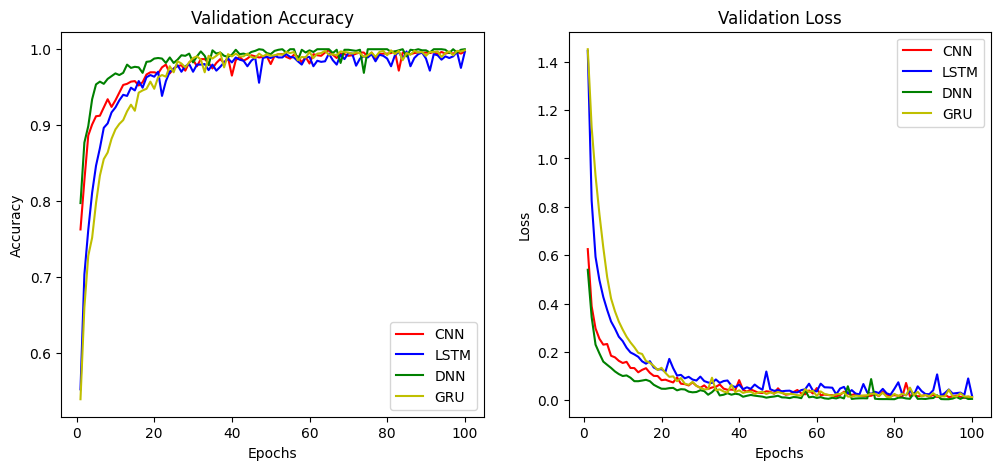

In [13]:
import matplotlib.pyplot as plt


# 그래프 그리기
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, val_accuracy_cnn, 'r', label='CNN')
plt.plot(epochs, val_accuracy_lstm,'b', label='LSTM')
plt.plot(epochs, val_accuracy_dnn, 'g', label='DNN')
plt.plot(epochs, val_accuracy_gru, 'y', label='GRU')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, val_loss_cnn, 'r', label='CNN')
plt.plot(epochs, val_loss_lstm, 'b', label='LSTM')
plt.plot(epochs, val_loss_dnn, 'g', label='DNN')
plt.plot(epochs, val_loss_gru, 'y', label='GRU')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## SVM 모델: epochs=100, batch_size=40


In [15]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 데이터 불러오기 및 전처리
five_folder = '0'
rock_folder = '1'
one1_folder = '2'
one2_folder = '3'
two1_folder = '4'
two2_folder = '5'
etc_folder = '6'

five_files = [f for f in os.listdir(five_folder) if f.endswith('.csv')]
rock_files = [f for f in os.listdir(rock_folder) if f.endswith('.csv')]
one1_files = [f for f in os.listdir(one1_folder) if f.endswith('.csv')]
one2_files = [f for f in os.listdir(one2_folder) if f.endswith('.csv')]
two1_files = [f for f in os.listdir(two1_folder) if f.endswith('.csv')]
two2_files = [f for f in os.listdir(two2_folder) if f.endswith('.csv')]
etc_files = [f for f in os.listdir(etc_folder) if f.endswith('.csv')]

# 데이터 병합
rock_data = np.vstack([pd.read_csv(os.path.join(rock_folder, file), header=None, skiprows=1).values for file in rock_files])
five_data = np.vstack([pd.read_csv(os.path.join(five_folder, file), header=None, skiprows=1).values for file in five_files])
one1_data = np.vstack([pd.read_csv(os.path.join(one1_folder, file), header=None, skiprows=1).values for file in one1_files])
one2_data = np.vstack([pd.read_csv(os.path.join(one2_folder, file), header=None, skiprows=1).values for file in one2_files])
two1_data = np.vstack([pd.read_csv(os.path.join(two1_folder, file), header=None, skiprows=1).values for file in two1_files])
two2_data = np.vstack([pd.read_csv(os.path.join(two2_folder, file), header=None, skiprows=1).values for file in two2_files])
etc_data = np.vstack([pd.read_csv(os.path.join(etc_folder, file), header=None, skiprows=1).values for file in etc_files])

# 레이블 지정
X = np.vstack([five_data, rock_data, one1_data, one2_data, two1_data, two2_data, etc_data])
y = np.hstack([np.zeros(len(five_files)), np.ones(len(rock_files)), 2*np.ones(len(one1_files)), 
               3*np.ones(len(one2_files)), 4*np.ones(len(two1_files)), 5*np.ones(len(two2_files)), 
               6*np.ones(len(etc_files))])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 생성 및 훈련
svm_model = SVC(kernel='linear')  # 선형 SVM
svm_model.fit(X_train, y_train)

# 테스트 세트 평가
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("테스트 세트 정확도:", accuracy)


ValueError: Found input variables with inconsistent numbers of samples: [291060, 13860]

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 불러오기 및 전처리
# 데이터 경로 설정 및 파일 불러오기
# 코드 생략

# 데이터를 numpy 배열로 변환
# 코드 생략

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# 모델 평가
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("테스트 세트 정확도:", accuracy)
